In [16]:
import sys
sys.path.append("..") #(This is lazy. Don't do this.)


from wavNN.train_model import TrainingLoop
from wavNN.models.wavMLP import *
from wavNN.data.nmist_generator import *

import torch

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [12]:
# Test 30 iterations of wavNN history

all_wavNN_history = {}
num_tests = 30

model_params = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "level": 2,
        "vanilla": False,
        "tail": True,
    }

data_params = {"sample_size": [4000, 2000, 2000], "split": True}


for iteration in range(30): 

    training = TrainingLoop(
        model_class=WavMLP,
        model_params=model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=80,
    )
    training()
    all_wavNN_history[iteration] = training.history

Text(0.5, 0, 'Epoch')

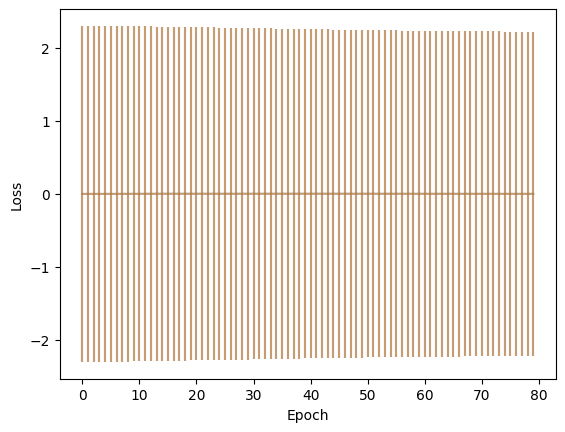

In [29]:
train_loss = np.asarray([all_wavNN_history[i]['train_loss'] for i in all_wavNN_history])
train_loss_mean = np.std(train_loss, axis=0)
train_loss_std = np.mean(train_loss, axis=0)

val_loss = np.asarray([all_wavNN_history[i]['val_loss'] for i in all_wavNN_history])
val_mean = np.std(train_loss, axis=0)
val_std = np.mean(train_loss, axis=0)

plt.errorbar(range(len(train_loss_mean)), train_loss_mean, yerr=train_loss_std, label="Train", alpha=.5)
plt.errorbar(range(len(train_loss_mean)), val_mean, yerr=val_std, label="Validation", alpha=.5)

plt.ylabel("Loss")
plt.xlabel("Epoch")

In [30]:
# Test 30 iterations of wavNN history

all_vanilla_history = {}
num_tests = 30

model_params = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "level": 2,
        "vanilla": True,
        "tail": True,
    }

data_params = {"sample_size": [4000, 2000, 2000], "split": True}


for iteration in range(30): 

    training = TrainingLoop(
        model_class=WavMLP,
        model_params=model_params,
        data_class=NMISTGenerator,
        data_params=data_params,
        optimizer=torch.optim.SGD,
        loss=torch.nn.CrossEntropyLoss,
        epochs=80,
    )
    training()
    all_vanilla_history[iteration] = training.history

Text(0.5, 0, 'Epoch')

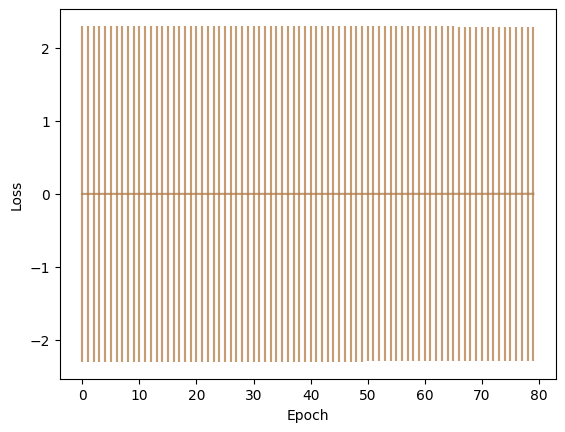

In [31]:
train_loss = np.asarray([all_vanilla_history[i]['train_loss'] for i in all_wavNN_history])
train_loss_mean = np.std(train_loss, axis=0)
train_loss_std = np.mean(train_loss, axis=0)

val_loss = np.asarray([all_vanilla_history[i]['val_loss'] for i in all_wavNN_history])
val_mean = np.std(train_loss, axis=0)
val_std = np.mean(train_loss, axis=0)

plt.errorbar(range(len(train_loss_mean)), train_loss_mean, yerr=train_loss_std, label="Train", alpha=.5)
plt.errorbar(range(len(train_loss_mean)), val_mean, yerr=val_std, label="Validation", alpha=.5)

plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
#   Message: Variance of a net this small, nearly completely dependent on its init weights. Cannot tell us anything. 
    # Need a better sample and a larger network to actually say anything definitive. 